In [1]:
import pandas as pd
import numpy as np
import vertica_python
import os
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

In [56]:
query = """
SELECT
CASE
    WHEN DAYOFWEEK(DATE(date)) = 1 THEN 'Sunday'
    WHEN DAYOFWEEK(DATE(date)) = 2 THEN 'Monday'
    WHEN DAYOFWEEK(DATE(date)) = 3 THEN 'Tuesday'
    WHEN DAYOFWEEK(DATE(date)) = 4 THEN 'Wednesday'
    WHEN DAYOFWEEK(DATE(date)) = 5 THEN 'Thursday'
    WHEN DAYOFWEEK(DATE(date)) = 6 THEN 'Friday'
    WHEN DAYOFWEEK(DATE(date)) = 7 THEN 'Saturday'
END AS day_of_week,
activity_type,
AVG(number_of_activities) AS cnt_activities,
COUNT(DISTINCT user_id) AS cnt_users
FROM
production.f_user_activity
WHERE date BETWEEN '2017-01-01' AND CURRENT_DATE()
GROUP BY 1,2
"""

In [57]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')

cur.execute(query)
extract = cur.fetchall()
df = pd.DataFrame(extract)

connection.close()

In [54]:
df

,day_of_week,cnt_activities,cnt_users
0,Monday,60.163041,1441504
1,Saturday,61.392109,1117704
2,Wednesday,61.199497,1569879
3,Sunday,64.965946,1135302
4,Thursday,58.993127,1485529
5,Tuesday,59.813382,1567331
6,Friday,57.847637,1381133


In [32]:
week_order = [
    'Sunday',
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday'
    
    
]

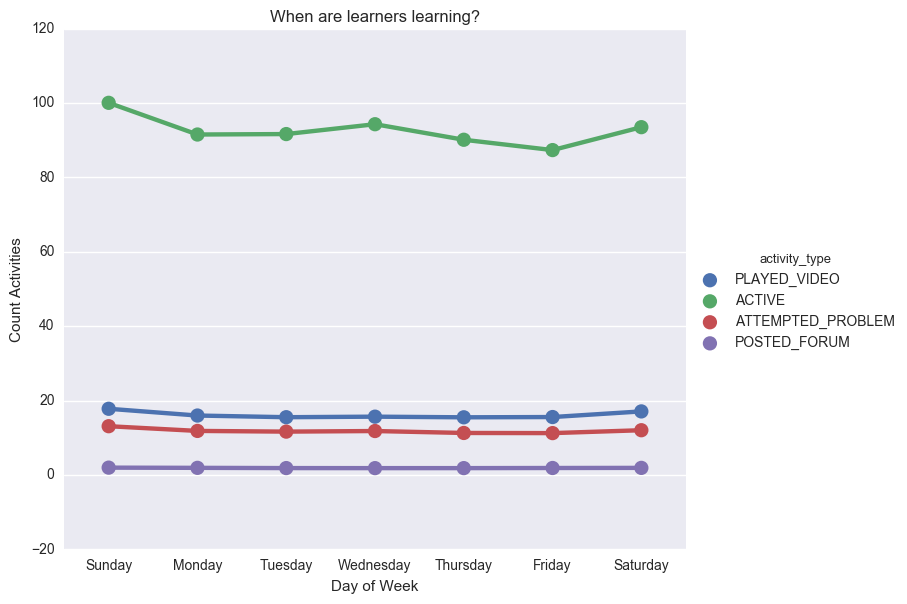

In [61]:
ax = sns.factorplot(
    data = df,
    x = 'day_of_week',
    y = 'cnt_activities',
    hue = 'activity_type',
    order = week_order,
    size = 6,
    aspect = 1.2


)

ax.set(

    title = 'When are learners learning?',
    ylabel = 'Count Activities',
    xlabel = 'Day of Week'
)

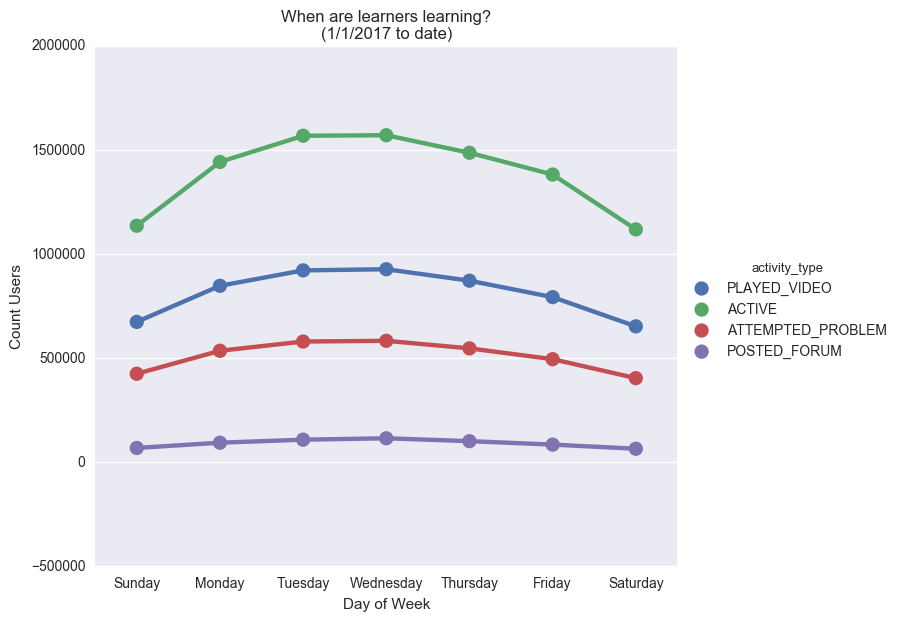

In [62]:
ax = sns.factorplot(
    data = df,
    x = 'day_of_week',
    y = 'cnt_users',
    hue = 'activity_type',
    order = week_order,
    size = 6,
    aspect = 1.2


)

ax.set(

    title = 'When are learners learning?\n(1/1/2017 to date)',
    ylabel = 'Count Users',
    xlabel = 'Day of Week'
)